In [1]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import sys
import venn

In [2]:
# fixme: Oryzabase Statistics
## Gold Database
## Gene: RAP, MSU, Gramene
## Trait: GO, TO, PO

# 这一个个子读取Oryzabase的全部数据

Oryzabase_file = '../data/Oryzabase/OryzabaseGeneListEn_20201014010048.sed.txt'

Oryzabase_rap_to_set = set()
Oryzabase_msu_to_set = set()
Oryzabase_gramene_to_set = set()

Oryzabase_rap_to_msu = defaultdict(set)
Oryzabase_msu_to_rap = defaultdict(set)
Oryzabase_msu_to_gramene = defaultdict(set)
Oryzabase_rap_to_gramene = defaultdict(set)

with open(Oryzabase_file, encoding='utf-8') as f:
    f.readline()
    for line in f:
        line = line.strip()
        rap_id_set = set(re.findall(r'Os\d{2}g\d{7}', line))
        msu_id_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))
        gramene_id_set = set(re.findall(r'GR:\d{7}', line))
        TO_id_set = set(re.findall(r'TO:\d{7}', line))
        GO_id_set = set(re.findall('GO:\d{7}', line))
        PO_id_set = set(re.findall(r'PO:\d{7}', line))
        
        # 统计三种id和 TO 的关联
        if rap_id_set and TO_id_set:
            for rap in rap_id_set:
                for to in TO_id_set:
                    Oryzabase_rap_to_set.add((rap, to))
        if msu_id_set and TO_id_set:
            for msu in msu_id_set:
                for to in TO_id_set:
                    Oryzabase_msu_to_set.add((msu, to))
        if gramene_id_set and TO_id_set:
            for gramene in gramene_id_set:
                for to in TO_id_set:
                    Oryzabase_gramene_to_set.add((gramene, to))
                    
        # 统计 MSU-RAP, MSU-Gramene, RAP-Gramene mapping.
        if msu_id_set and rap_id_set:
            for msu in msu_id_set:
                Oryzabase_msu_to_rap[msu].update(rap_id_set)
            for rap in rap_id_set:
                Oryzabase_rap_to_msu[rap].update(msu_id_set)
        if msu_id_set and gramene_id_set:
            for msu in msu_id_set:
                Oryzabase_msu_to_gramene[msu].update(gramene_id_set)
        if rap_id_set and gramene_id_set:
            for rap in rap_id_set:
                Oryzabase_rap_to_gramene[rap ].update(gramene_id_set)


print(f'Original Oryzabase MSU-TO Pair Count: {len(Oryzabase_msu_to_set):,}')
print(f'Original Oryzabase RAP-TO Pair Count: {len(Oryzabase_rap_to_set):,}')
print(f'Original Oryzabase Gramene-TO Pair Count: {len(Oryzabase_gramene_to_set):,}')


Original Oryzabase MSU-TO Pair Count: 14,695
Original Oryzabase RAP-TO Pair Count: 14,914
Original Oryzabase Gramene-TO Pair Count: 3,404


In [6]:
# todo: 统计 MSU2RAP文件 和 Oryzabase 提供的 MSU2RAP2Gramene 文件覆盖程度
## RAPDB: RAP-MSU
## Oryzabase: RAP-MSU-Gramene

rap_db_mapping_file = '../data/database-RAPDB/RAP-MSU_2020-09-09.txt'
oryzabase_mapping_file = '../data/database-OryzaBase/OryzabaseGeneListEn_20201014010048.sed.txt'
RAPDB_Oryzabase_merge_file = '../data/database-Merge/RAPDB-Oryzabase.merge.txt'

RAPDB_msu_to_rap = defaultdict(set)
RAPDB_rap_to_msu = defaultdict(set)
with open(rap_db_mapping_file) as f:
    for line in f:
        rap_set = set(re.findall(r'Os\d{2}g\d{7}', line))
        msu_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))

        if rap_set and msu_set:
            for msu in msu_set:
                RAPDB_msu_to_rap[msu].update(rap_set)
        if rap_set and msu_set:
            for rap in rap_set:
                RAPDB_rap_to_msu[rap].update(msu_set)

print(f'RAP-DB MSU-RAP Mapping Count: {len(RAPDB_msu_to_rap):,}')
print(f'RAP-DB RAP-MSU Mapping Count: {len(RAPDB_rap_to_msu):,}')
print()
print(f'Oryzabase MSU-RAP Mapping Count: {len(Oryzabase_msu_to_rap):,}')
print(f'Oryzabase MSU-Gramene Mapping Count: {len(Oryzabase_msu_to_gramene):,}')
print(f'Oryzabase RAP-MSU Mapping Count: {len(Oryzabase_rap_to_msu):,}')
print(f'Oryzabase RAP-Gramene Mapping Count: {len(Oryzabase_rap_to_gramene):,}')

RAP-DB MSU-RAP Mapping Count: 32,831
RAP-DB RAP-MSU Mapping Count: 33,679

Oryzabase MSU-RAP Mapping Count: 12,232
Oryzabase MSU-Gramene Mapping Count: 389
Oryzabase RAP-MSU Mapping Count: 12,317
Oryzabase RAP-Gramene Mapping Count: 406


In [4]:
Oryzabase_msu_to_rap

defaultdict(set,
            {'LOC_Os09g25490': {'Os09g0422500'},
             'LOC_Os04g35210': {'Os04g0431700'},
             'LOC_Os04g41620': {'Os04g0493400'},
             'LOC_Os02g27620': {'Os02g0477700'},
             'LOC_Os04g46470': {'Os04g0550600'},
             'LOC_Os06g37364': {'Os06g0570100'},
             'LOC_Os02g39890': {'Os02g0612300'},
             'LOC_Os04g38810': {'Os04g0461800'},
             'LOC_Os04g59624': {'Os04g0692750'},
             'LOC_Os06g50340': {'Os06g0717200'},
             'LOC_Os11g38270': {'Os11g0595400'},
             'LOC_Os07g47330': {'Os07g0669500'},
             'LOC_Os02g15150': {'Os02g0249600'},
             'LOC_Os01g55690': {'Os01g0762500'},
             'LOC_Os10g26060': {'Os10g0400200'},
             'LOC_Os03g31360': {'Os03g0427300'},
             'LOC_Os03g49350': {'Os03g0700400'},
             'LOC_Os01g57340': {'Os01g0782100'},
             'LOC_Os09g15840': {'Os09g0327575', 'Os09g0327600'},
             'LOC_Os10g26340': {'Os1

In [5]:
# 


RAPDB_MSU_RAP_set = set()
Oryzabase_MSU_RAP_set = set()
Oryzabase_MSU_Gramene_set = set()

RAPDB_RAP_MSU_set = set()
Oryzabase_RAP_MSU_set = set()


for msu, rap_set in RAPDB_msu_to_rap.items():
    for rap in rap_set:
        RAPDB_MSU_RAP_set.add((msu, rap))
        RAPDB_RAP_MSU_set.add((rap, msu))

for msu, rap_set in Oryzabase_msu_to_rap.items():
    for rap in rap_set:
        Oryzabase_MSU_RAP_set.add((msu, rap))
        Oryzabase_RAP_MSU_set.add((rap, msu))

for msu, gramene_set in Oryzabase_msu_to_gramene.items():
    for gramene in gramene_set:
        Oryzabase_MSU_Gramene_set.add((msu, gramene))

print(f'RAPDB MSU-RAP Pair Count: {len(RAPDB_MSU_RAP_set):,}.')
print(f'Oryzabase MSU-RAP Pair Count: {len(Oryzabase_MSU_RAP_set):,}.')
print(f'Oryzabase MSU-Gramene Pair Count: {len(Oryzabase_MSU_Gramene_set):,}')

len(RAPDB_MSU_RAP_set - Oryzabase_MSU_RAP_set)
len(Oryzabase_MSU_RAP_set - RAPDB_MSU_RAP_set)
msu_rap_merge_dict = defaultdict(set)

RAPDB MSU-RAP Pair Count: 34,133.
Oryzabase MSU-RAP Pair Count: 12,556.
Oryzabase MSU-Gramene Pair Count: 402


Merge RAP-MSU set: 34,392
Merge RAP-MSU dict: 33,807


d:\pto_env_test\lib\site-packages\venn\_backwards_compatibility.py:16: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "`get_labels()` is retained for backwards compatibility; " +
d:\pto_env_test\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


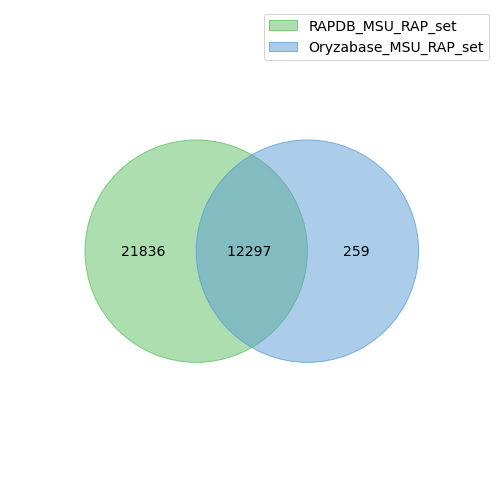

In [6]:
# RAPDB & Oryzabase MSU-RAP & RAP-MSU
labels = venn.get_labels([RAPDB_MSU_RAP_set, Oryzabase_MSU_RAP_set],
                         fill=['number'])
fig, ax = venn.venn2(labels, names=['RAPDB_MSU_RAP_set', 'Oryzabase_MSU_RAP_set'])
fig.show()

d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


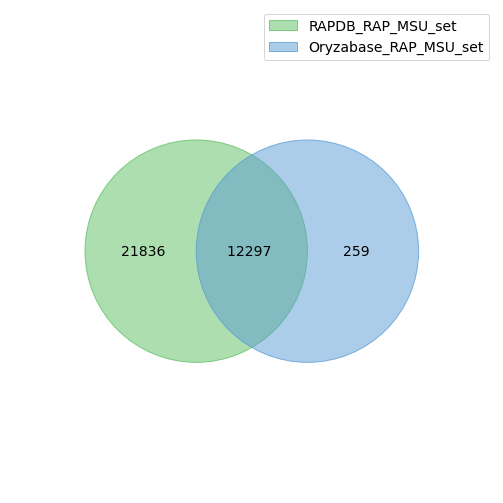

In [7]:
# RAPDB & Oryzabase RAP-MSU
labels = venn.get_labels([RAPDB_RAP_MSU_set, Oryzabase_RAP_MSU_set],
                         fill=['number'])
fig, ax = venn.venn2(labels, names=['RAPDB_RAP_MSU_set', 'Oryzabase_RAP_MSU_set'])
fig.show()

In [33]:
merged_rap_msu_set = RAPDB_RAP_MSU_set | Oryzabase_RAP_MSU_set

merged_rap_msu_dict = defaultdict(set)

for (rap, msu) in merged_rap_msu_set:
    merged_rap_msu_dict[rap].add(msu)
    
print(f'Merge RAP-MSU set: {len(merged_rap_msu_set):,}')
print(f'Merge RAP-MSU dict: {len(merged_rap_msu_dict):,}')

writed_msu_set = set()
with open(RAPDB_Oryzabase_merge_file, 'w') as wf:
    wf.write('RAP ID\tMSU ID\tGramene ID\n')
    for rap, msu_set in merged_rap_msu_dict.items():
        gramene_set = set()
        for msu in msu_set:
            gramene = Oryzabase_msu_to_gramene[msu]
            gramene_set.update(gramene)
            writed_msu_set.add(msu)
        msu_wf = ','.join(msu_set)
        gramene_wf = ','.join(gramene_set) if gramene_set else 'None'
        wf.write(f'{rap}\t{msu_wf}\t{gramene_wf}\n')

    for (msu, gramene) in Oryzabase_MSU_Gramene_set:
        if msu not in writed_msu_set:
            wf.write(f'None\t{msu}\t{gramene}\n')

            
            
print(f'{RAPDB_Oryzabase_merge_file} save done.')

Merge RAP-MSU set: 34,392
Merge RAP-MSU dict: 33,807
../data/database-Merge/RAPDB-Oryzabase.merge.txt save done.


In [34]:
# fixme: Read database-merge file

RAPDB_Oryzabase_merge_file = '../data/database-Merge/RAPDB-Oryzabase.merge.txt'

merge_rap_to_msu = defaultdict(set)
merge_rap_to_gramene = defaultdict(set)
merge_msu_to_gramene = defaultdict(set)
merge_msu_to_rap = defaultdict(set)

with open(RAPDB_Oryzabase_merge_file) as f:
    f.readline()
    for line in f:
        rap_id_set = set(re.findall(r'Os\d+g\d{7}', line))
        msu_id_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))
        gramene_id_set = set(re.findall(r'GR:\d{7}', line))
        
        if rap_id_set and msu_id_set:
            for rap in rap_id_set:
                merge_rap_to_msu[rap].update(msu_id_set)
            for msu in msu_id_set:
                merge_msu_to_rap[msu].update(rap_id_set)
        if rap_id_set and gramene_id_set:
            for rap in rap_id_set:
                merge_rap_to_gramene[rap].update(gramene_id_set)
        if msu_id_set and gramene_id_set:
            for msu in msu_id_set:
                merge_msu_to_gramene[msu].update(gramene_id_set)


print(f'Merged RAP-MSU Count: {len(merge_rap_to_msu):,}')
print(f'Merged MSU-RAP Count: {len(merge_msu_to_rap):,}')
print(f'Merged RAP-Gramene Count: {len(merge_rap_to_gramene):,}')
print(f'Merged MSU-Gramene Count: {len(merge_msu_to_gramene):,}')


Merged RAP-MSU Count: 33,807
Merged MSU-RAP Count: 32,915
Merged RAP-Gramene Count: 408
Merged MSU-Gramene Count: 395


In [82]:
# todo: 更新 Oryzabase 数据库

Oryzabase_file = '../data/Oryzabase/OryzabaseGeneListEn_20201014010048.sed.txt'
Oryzabase_merge_file = '../data/database-Merge/OryzabaseGeneListEn.merge.txt'

wf = open(Oryzabase_merge_file, 'w')
wf.write('RAP ID\tMSU ID\tGramene ID\tTO\tGO\tPO\n')
with open(Oryzabase_file, encoding='utf-8') as f:
    line = f.readline()
    for line in f:

        msu_id_set = set()
        gramene_id_set = set()

        rap_id_set = set(re.findall(r'Os\d{2}g\d{7}', line))
        for rap in rap_id_set:
            msu_id_set.update(merge_rap_to_msu[rap])
            gramene_id_set.update(merge_rap_to_gramene[rap])
        for msu in msu_id_set:
            gramene_id_set.update(merge_msu_to_gramene[msu])

        msu_id_set.update(set(re.findall(r'LOC_Os\d{2}g\d{5}', line)))
        gramene_id_set.update(set(re.findall(r'GR:\d{7}', line)))
        to_id_set = set(re.findall(r'TO:\d{7}', line))
        go_id_set = set(re.findall('GO:\d{7}', line))
        po_id_set = set(re.findall(r'PO:\d{7}', line))

        wf.write(f'{",".join(rap_id_set)}\t{",".join(msu_id_set)}'
                 f'\t{",".join(gramene_id_set)}\t{",".join(to_id_set)}'
                 f'\t{",".join(go_id_set)}\t{",".join(po_id_set)}\n')

wf.close()
print(f'{Oryzabase_merge_file} save done.')

../data/database-Merge/OryzabaseGeneListEn.merge.txt save done.


In [83]:
# fixme: RAP based Merge
## Oryzabase_MSU_Gramene_set
merge_msu_set = set()
merge_gramene_set = set()
writed_msu_set = set()
with open(RAPDB_Oryzabase_merge_file, 'w') as wf:
    wf.write('RAP ID\tMSU ID\tGramene ID\n')
    for rap, msu_set in Oryzabase_rap_to_msu.items():
        if RAPDB_rap_to_msu.get(rap):
            merge_msu_set = msu_set | RAPDB_rap_to_msu[rap]
        else:
            merge_msu_set = msu_set
        writed_msu_set.update(msu_set)
        if Oryzabase_rap_to_gramene.get(rap):
            merge_gramene_set = Oryzabase_rap_to_gramene[rap]
        else:
            merge_gramene_set =set()

        msu_wf = ','.join(merge_msu_set)
        gramene_wf = ','.join(merge_gramene_set)
        wf.write(f'{rap}\t{msu_wf}\t{gramene_wf}\n')

    for msu, gramene_set in Oryzabase_msu_to_gramene.items():
        if msu not in writed_msu_set:
            gramene_wf = ','.join(gramene_set)
            wf.write(f'None\t{msu}\t{gramene_wf}\n')

print(f'{RAPDB_Oryzabase_merge_file} save done.')

../data/database-Merge/RAPDB-Oryzabase.merge.txt save done.


In [38]:
# fixme: Read database-merge file
RAPDB_Oryzabase_merge_file = '../data/database-Merge/RAPDB-Oryzabase.merge.txt'

merge_rap_to_msu = defaultdict(set)
merge_rap_to_gramene = defaultdict(set)
merge_msu_to_gramene = defaultdict(set)
merge_msu_to_rap = defaultdict(set)

with open(RAPDB_Oryzabase_merge_file) as f:
    f.readline()
    for line in f:
        rap_id_set = set(re.findall(r'Os\d+g\d{7}', line))
        msu_id_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))
        gramene_id_set = set(re.findall(r'GR:\d{7}', line))
        
        if rap_id_set and msu_id_set:
            for rap in rap_id_set:
                merge_rap_to_msu[rap].update(msu_id_set)
            for msu in msu_id_set:
                merge_msu_to_rap[msu].update(rap_id_set)
        if rap_id_set and gramene_id_set:
            for rap in rap_id_set:
                merge_rap_to_gramene[rap].update(gramene_id_set)
        if msu_id_set and gramene_id_set:
            for msu in msu_id_set:
                merge_msu_to_gramene[msu].update(gramene_id_set)


print(f'Merge RAP-MSU Count: {len(merge_rap_to_msu):,}')
print(f'Merge MSU-RAP Count: {len(merge_msu_to_rap):,}')
print(f'Merge RAP-Gramene Count: {len(merge_rap_to_gramene):,}')
print(f'Merge MSU-Gramene Count: {len(merge_msu_to_gramene):,}')

Merge RAP-MSU Count: 33,807
Merge MSU-RAP Count: 32,915
Merge RAP-Gramene Count: 408
Merge MSU-Gramene Count: 395


In [39]:
# todo: 更新 Oryzabase 数据库

Oryzabase_file = '../data/Oryzabase/OryzabaseGeneListEn_20201014010048.sed.txt'
Oryzabase_merge_file = '../data/database-Merge/OryzabaseGeneListEn.merge.txt'

wf = open(Oryzabase_merge_file, 'w')
wf.write('RAP ID\tMSU ID\tGramene ID\tTO\tGO\tPO\n')
with open(Oryzabase_file, encoding='utf-8') as f:
    line = f.readline()
    for line in f:
        rap_id_set = set(re.findall(r'Os\d{2}g\d{7}', line))
        msu_id_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))
        gramene_id_set = set(re.findall(r'GR:\d{7}', line))
        to_id_set = set(re.findall(r'TO:\d{7}', line))
        go_id_set = set(re.findall('GO:\d{7}', line))
        po_id_set = set(re.findall(r'PO:\d{7}', line))

        for rap in rap_id_set:
            msu_id_set.update(merge_rap_to_msu[rap])
            gramene_id_set.update(merge_rap_to_gramene[rap])
        for msu in msu_id_set:
            gramene_id_set.update(merge_msu_to_gramene[msu])

        rap = ",".join(rap_id_set) if rap_id_set else 'None'
        msu = ",".join(msu_id_set) if msu_id_set else 'None'
        gramene = ",".join(gramene_id_set) if gramene_id_set else 'None'
        to_id = ",".join(to_id_set) if to_id_set else 'None'
        go_id = ",".join(go_id_set) if go_id_set else 'None'
        po_id = ",".join(po_id_set) if po_id_set else 'None'
        
        wf.write(f'{rap}\t{msu}\t{gramene}\t'
                 f'{to_id}\t{go_id}\t{po_id}\n')
wf.close()

print(f'Oryzabase Merge file: {Oryzabase_merge_file} save done.')

../data/database-Merge/OryzabaseGeneListEn.merge.txt save done.


In [85]:
# todo: 统计整合后的 Oryzabase

Oryzabase_merge_file = '../data/database-Merge/OryzabaseGeneListEn.merge.txt'

merge_Oryzabase_rap_to_set = set()
merge_Oryzabase_msu_to_set = set()
merge_Oryzabase_gramene_to_set = set()

with open(Oryzabase_merge_file) as f:
    f.readline()
    for line in f:
        line = line.strip()

        rap_id_set = set(re.findall(r'Os\d{2}g\d{7}', line))
        msu_id_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))
        gramene_id_set = set(re.findall(r'GR:\d{7}', line))

        to_id_set = set(re.findall(r'TO:\d{7}', line))
        go_id_set = set(re.findall('GO:\d{7}', line))
        po_id_set = set(re.findall(r'PO:\d{7}', line))

        if rap_id_set and to_id_set:
            for rap in rap_id_set:
                for to in to_id_set:
                    merge_Oryzabase_rap_to_set.add((rap, to))

        if msu_id_set and to_id_set:
            for msu in msu_id_set:
                for to in to_id_set:
                    merge_Oryzabase_msu_to_set.add((msu, to))

        if gramene_id_set and to_id_set:
            for gramene in gramene_id_set:
                for to in to_id_set:
                    merge_Oryzabase_gramene_to_set.add((gramene, to))

print(f'Merged Oryzabase RAP-TO Count: {len(merge_Oryzabase_rap_to_set):,}')
print(f'Merged Oryzabase MSU-TO Count: {len(merge_Oryzabase_msu_to_set):,}')
print(f'Merged Oryzabase Gramene-TO Count: {len(merge_Oryzabase_gramene_to_set):,}')


Merged Oryzabase RAP-TO Count: 14,914
Merged Oryzabase MSU-TO Count: 15,005
Merged Oryzabase Gramene-TO Count: 3,434


In [86]:
# fixme: GTAE
## Gene: RAP/MSU/Gramene
## Trait: TO
## 整合了 RAPDB

def read_GTAE_result(GTAE_result_file: str, merged_rap_to_msu: dict,
                     merged_rap_to_gramene: dict):

    original_GTAE_MSU_to_TO_set = set()
    original_GTAE_RAP_to_TO_set = set()
    original_GTAE_Gramene_to_TO_set = set()

    merge_GTAE_MSU_to_TO_set = set()
    merge_GTAE_RAP_to_TO_set = set()
    merge_GTAE_Gramene_to_TO_set = set()

    with open(GTAE_result_file) as f:
        f.readline()
        for line in f:
            line_split = line.strip().split('\t')
            to_id = line_split[ 0 ]
            rap_id_set = set(re.findall(r'Os\d+g\d{7}', line))

            msu_id_set = set(re.findall(r'LOC_Os\d{2}g\d{5}', line))
            gramene_id_set = set(re.findall(r'GR:\d{7}', line))

            for rap in rap_id_set:
                original_GTAE_RAP_to_TO_set.add((rap, to))
            for msu in msu_id_set:
                original_GTAE_MSU_to_TO_set.add((msu, to))
            for gramene in gramene_id_set:
                original_GTAE_Gramene_to_TO_set.add((gramene, to))

            for rap in rap_id_set:
                msu_id_set.update(merged_rap_to_msu[rap])
                gramene_id_set.update(merged_rap_to_gramene[rap])

            if rap_id_set:
                for rap in rap_id_set:
                    merge_GTAE_RAP_to_TO_set.add((rap, to_id))
            if msu_id_set:
                for msu in msu_id_set:
                    merge_GTAE_MSU_to_TO_set.add((msu, to_id))
            if gramene_id_set:
                for gramene in gramene_id_set:
                    merge_GTAE_Gramene_to_TO_set.add((gramene, to_id))
    return merge_GTAE_RAP_to_TO_set, merge_GTAE_MSU_to_TO_set, \
           merge_GTAE_Gramene_to_TO_set, original_GTAE_RAP_to_TO_set, \
           original_GTAE_MSU_to_TO_set, original_GTAE_Gramene_to_TO_set



In [87]:
# Sentence level
sentence_evidence_file = '../result/gene_normalization_result/Sentence.evidence.normalization.txt'

merge_GTAE_RAP_to_TO_sent_set, merge_GTAE_MSU_to_TO_sent_set, merge_GTAE_Gramene_to_TO_sent_set, \
    original_GTAE_RAP_to_TO_sent_set, original_GTAE_MSU_to_TO_sent_set, original_GTAE_Gramene_to_TO_sent_set = \
    read_GTAE_result(sentence_evidence_file, merge_rap_to_msu, merge_rap_to_gramene)

print(f'Original GTAE Sentence-Level RAP-TO Pair Count: {len(original_GTAE_RAP_to_TO_sent_set):,}')
print(f'Original GTAE Sentence-Level MSU-TO Pair Count: {len(original_GTAE_MSU_to_TO_sent_set):,}')
print(f'Original GTAE Sentence-Level Gramene-TO Pair Count: {len(original_GTAE_Gramene_to_TO_sent_set):,}')

print(f'Merged GTAE Sentence-Level RAP-TO Pair Count: {len(merge_GTAE_RAP_to_TO_sent_set):,}')
print(f'Merged GTAE Sentence-Level MSU-TO Pair Count: {len(merge_GTAE_MSU_to_TO_sent_set):,}')
print(f'Merged GTAE Sentence-Level Gramene-TO Pair Count: {len(merge_GTAE_Gramene_to_TO_sent_set):,}')

# Abstract level
abstract_evidence_file = '../result/gene_normalization_result/AllPubtator.Evidence.normalization.txt'

merge_GTAE_RAP_to_TO_abs_set, merge_GTAE_MSU_to_TO_abs_set, merge_GTAE_Gramene_to_TO_abs_set, \
original_GTAE_RAP_to_TO_abs_set, original_GTAE_MSU_to_TO_abs_set, original_GTAE_Gramene_to_TO_abs_set\
    = read_GTAE_result(abstract_evidence_file, merge_rap_to_msu, merge_rap_to_gramene)

print(f'Original GTAE Abstract-Level RAP-TO Pair Count: {len(original_GTAE_RAP_to_TO_abs_set):,}')
print(f'Original GTAE Abstract-Level MSU-TO Pair Count: {len(original_GTAE_MSU_to_TO_abs_set):,}')
print(f'Original GTAE Abstract-Level Gramene-TO Pair Count: {len(original_GTAE_Gramene_to_TO_abs_set):,}')

print(f'Merged GTAE Abstract-Level RAP-TO Pair Count: {len(merge_GTAE_RAP_to_TO_abs_set):,}')
print(f'Merged GTAE Abstract-Level MSU-TO Pair Count: {len(merge_GTAE_MSU_to_TO_abs_set):,}')
print(f'Merged GTAE Abstract-Level Gramene-TO Pair Count: {len(merge_GTAE_Gramene_to_TO_abs_set):,}')


Original GTAE Sentence-Level RAP-TO Pair Count: 1,557
Original GTAE Sentence-Level MSU-TO Pair Count: 1,557
Original GTAE Sentence-Level Gramene-TO Pair Count: 303
Merged GTAE Sentence-Level RAP-TO Pair Count: 6,806
Merged GTAE Sentence-Level MSU-TO Pair Count: 6,807
Merged GTAE Sentence-Level Gramene-TO Pair Count: 2,040
Original GTAE Abstract-Level RAP-TO Pair Count: 2,693
Original GTAE Abstract-Level MSU-TO Pair Count: 2,688
Original GTAE Abstract-Level Gramene-TO Pair Count: 547
Merged GTAE Abstract-Level RAP-TO Pair Count: 15,808
Merged GTAE Abstract-Level MSU-TO Pair Count: 15,954
Merged GTAE Abstract-Level Gramene-TO Pair Count: 5,455


In [88]:
# Check why the abstract co-occurrence result does not include 
# all the sentence co-occurrence result

In [89]:
# RAP-TO in sentence co-occurrence result and abstract co-occurrence result

In [90]:
print(f'Original GTAE Sentence-Level RAP-TO Pair Count: {len(original_GTAE_RAP_to_TO_sent_set):,}')
print(f'Original GTAE Abstract-Level RAP-TO Pair Count: {len(original_GTAE_RAP_to_TO_abs_set):,}')

Original GTAE Sentence-Level RAP-TO Pair Count: 1,557
Original GTAE Abstract-Level RAP-TO Pair Count: 2,693


d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


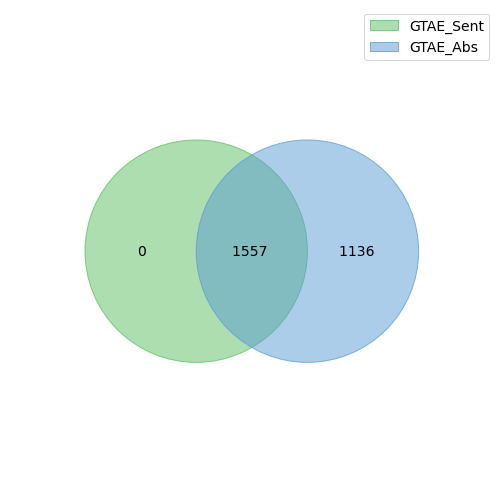

In [91]:
# RAP-TO of sentence-level result and abstract-level result
labels = venn.get_labels([original_GTAE_RAP_to_TO_sent_set, original_GTAE_RAP_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn2(labels, names=['GTAE_Sent', 'GTAE_Abs'])
fig.show()

In [92]:
# fixme: TAS Database Statistics
# todo: 对TAS文件MSU ID提供转换
# todo: 保存整合后的TAS数据库
## Gene: MSU ID
## Trait: TO ID

TAS_file = '../data/database-TAS/TAS.association.tsv'
TAS_merge_file = '../data/database-Merge/TAS.merge.txt'

TAS_msu_to_set = set()
TAS_rap_to_set = set()
TAS_gramene_to_set = set()

original_TAS_rap_to_set = set()
original_TAS_gramene_to_set = set()


wf = open(TAS_merge_file, 'w')
wf.write('RAP ID\tMSU ID\tGramene ID\tTO\n')
with open(TAS_file) as f:
    f.readline()
    f.readline()
    for line in f:
        l = line.strip().split('\t')
        msu = l[2]
        to = l[-1]
        to_name = l[-2]

        if msu in Oryzabase_msu_to_rap.keys():
            for rap in Oryzabase_msu_to_rap[msu]:
                original_TAS_rap_to_set.add((rap, to))
        if msu in Oryzabase_msu_to_gramene.keys():
            for gramene in Oryzabase_msu_to_gramene.keys():
                original_TAS_gramene_to_set.add((rap, to))


        rap_id_set = merge_msu_to_rap[msu]
        gramene_id_set = merge_msu_to_gramene[msu]

        wf.write(f'{",".join(rap_id_set)}\t{msu}\t{",".join(gramene_id_set)}'
                 f'\t{to}\n')

        TAS_msu_to_set.add((msu, to))


        for rap in rap_id_set:
            TAS_rap_to_set.add((rap, to))
        for gramene in gramene_id_set:
            TAS_gramene_to_set.add((gramene, to))

print(f'TAS Database: MSU - TO')
print(f'Original TAS MSU-TO Pair Count: {len(TAS_msu_to_set):,}')
print(f'Oryzabase based TAS RAP-TO set: {len(original_TAS_rap_to_set):,}')
print(f'Oryzabase based TAS Gramene-TO set: {len(original_TAS_gramene_to_set):,}')


print(f'Merged TAS RAP-TO Pair Count: {len(TAS_rap_to_set):,}')
print(f'Merged TAS Gramene-TO Pair Count: {len(TAS_gramene_to_set):,}')
print(f'{TAS_merge_file} save done.')


TAS Database: MSU - TO
Original TAS MSU-TO Pair Count: 76,889
Oryzabase based TAS RAP-TO set: 20,267
Oryzabase based TAS Gramene-TO set: 755
Merged TAS RAP-TO Pair Count: 20,272
Merged TAS Gramene-TO Pair Count: 783
../data/database-Merge/TAS.merge.txt save done.


d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


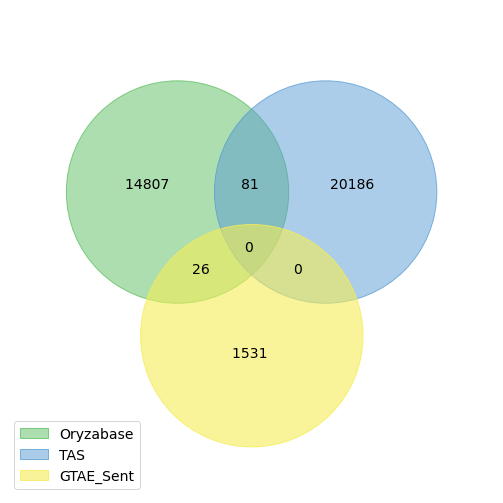

In [103]:
# Orriginal Database Compare
# RAP
labels = venn.get_labels([Oryzabase_rap_to_set, original_TAS_rap_to_set,
                         original_GTAE_RAP_to_TO_sent_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent'])
fig.show()



d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


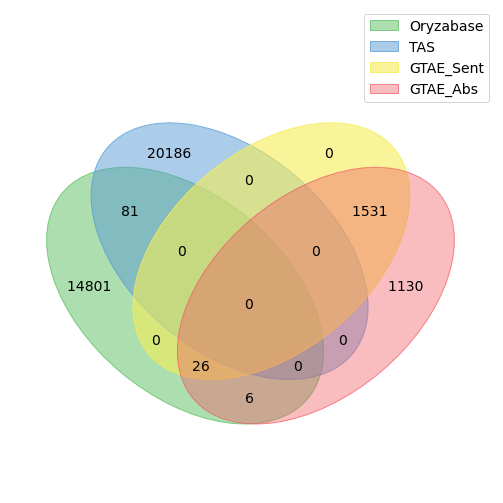

In [93]:
# Orriginal Database Compare
# RAP
labels = venn.get_labels([Oryzabase_rap_to_set, original_TAS_rap_to_set,
                         original_GTAE_RAP_to_TO_sent_set, original_GTAE_RAP_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent', 'GTAE_Abs'])
fig.show()



d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


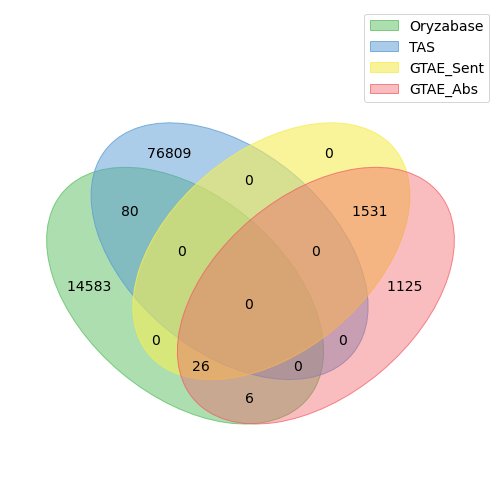

In [94]:
# Orriginal Database Compare
# MSU
labels = venn.get_labels([Oryzabase_msu_to_set, TAS_msu_to_set,
                         original_GTAE_MSU_to_TO_sent_set, original_GTAE_MSU_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent', 'GTAE_Abs'])
fig.show()


d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


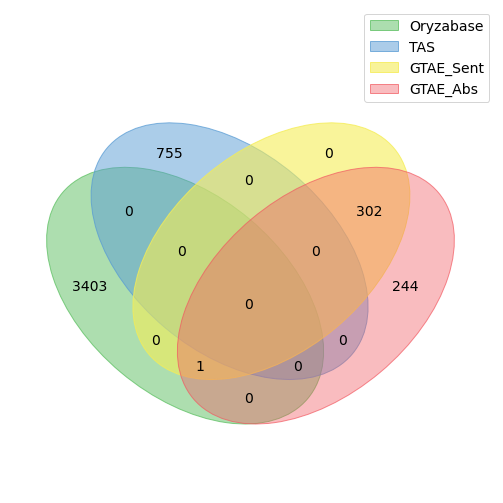

In [95]:
# Orriginal Database Compare
# Gramene
labels = venn.get_labels([Oryzabase_gramene_to_set, original_TAS_gramene_to_set,
                         original_GTAE_Gramene_to_TO_sent_set, original_GTAE_Gramene_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent', 'GTAE_Abs'])
fig.show()


In [96]:
print(f'Original Oryzabase MSU-TO Pair Count: {len(Oryzabase_msu_to_set):,}')
print(f'Original Oryzabase RAP-TO Pair Count: {len(Oryzabase_rap_to_set):,}')
print(f'Original Oryzabase Gramene-TO Pair Count: {len(Oryzabase_gramene_to_set):,}')

print(f'Original TAS MSU-TO Pair Count: {len(TAS_msu_to_set):,}')
print(f'Oryzabase based TAS RAP-TO set: {len(original_TAS_rap_to_set):,}')
print(f'Oryzabase based TAS Gramene-TO set: {len(original_TAS_gramene_to_set):,}')


print(f'Original GTAE Sentence-Level RAP-TO Pair Count: {len(original_GTAE_RAP_to_TO_sent_set):,}')
print(f'Original GTAE Sentence-Level MSU-TO Pair Count: {len(original_GTAE_MSU_to_TO_sent_set):,}')
print(f'Original GTAE Sentence-Level Gramene-TO Pair Count: {len(original_GTAE_Gramene_to_TO_sent_set):,}')

print(f'Original GTAE Abstract-Level RAP-TO Pair Count: {len(original_GTAE_RAP_to_TO_abs_set):,}')
print(f'Original GTAE Abstract-Level MSU-TO Pair Count: {len(original_GTAE_MSU_to_TO_abs_set):,}')
print(f'Original GTAE Abstract-Level Gramene-TO Pair Count: {len(original_GTAE_Gramene_to_TO_abs_set):,}')


Original Oryzabase MSU-TO Pair Count: 14,695
Original Oryzabase RAP-TO Pair Count: 14,914
Original Oryzabase Gramene-TO Pair Count: 3,404
Original TAS MSU-TO Pair Count: 76,889
Oryzabase based TAS RAP-TO set: 20,267
Oryzabase based TAS Gramene-TO set: 755
Original GTAE Sentence-Level RAP-TO Pair Count: 1,557
Original GTAE Sentence-Level MSU-TO Pair Count: 1,557
Original GTAE Sentence-Level Gramene-TO Pair Count: 303
Original GTAE Abstract-Level RAP-TO Pair Count: 2,693
Original GTAE Abstract-Level MSU-TO Pair Count: 2,688
Original GTAE Abstract-Level Gramene-TO Pair Count: 547


d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


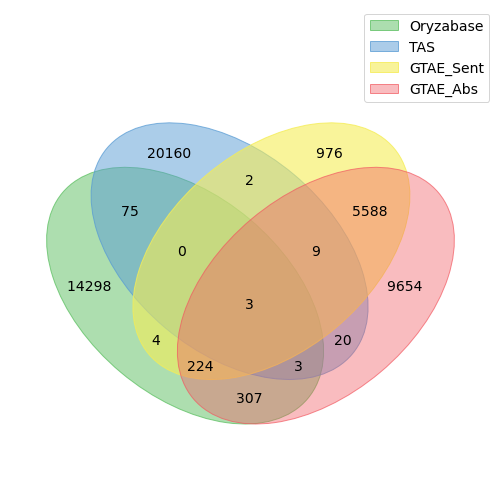

In [97]:
# RAP Venn
labels = venn.get_labels([Oryzabase_rap_to_set, TAS_rap_to_set,
                         GTAE_RAP_to_TO_sent_set, GTAE_RAP_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent', 'GTAE_Abs'])
fig.show()

d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


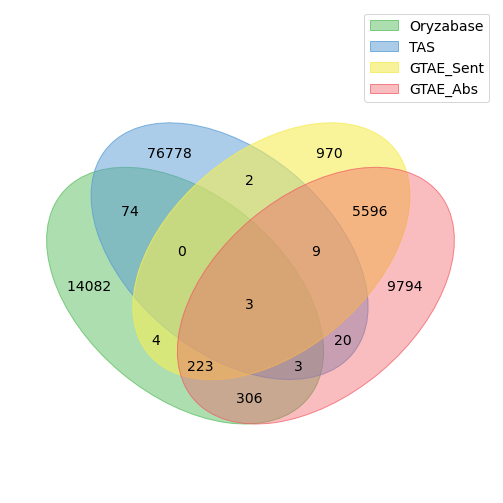

In [98]:
# MSU Venn
# RAP Venn
labels = venn.get_labels([Oryzabase_msu_to_set, TAS_msu_to_set,
                         GTAE_MSU_to_TO_sent_set, GTAE_MSU_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent', 'GTAE_Abs'])
fig.show()


d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


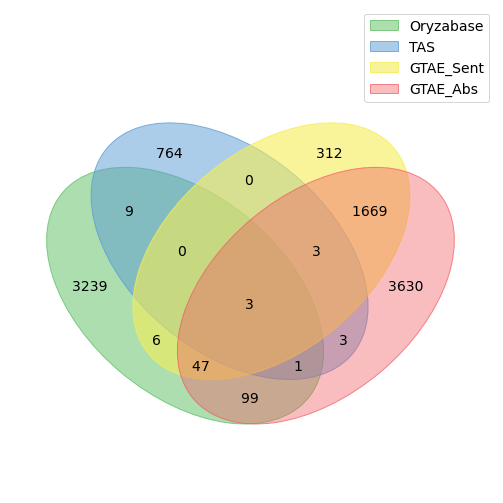

In [99]:
# Gramene Venn
# MSU Venn
# RAP Venn
labels = venn.get_labels([Oryzabase_gramene_to_set, TAS_gramene_to_set,
                         GTAE_Gramene_to_TO_sent_set, GTAE_Gramene_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn4(labels, names=['Oryzabase', 'TAS', 'GTAE_Sent', 'GTAE_Abs'])
fig.show()


d:\pto_env_test\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


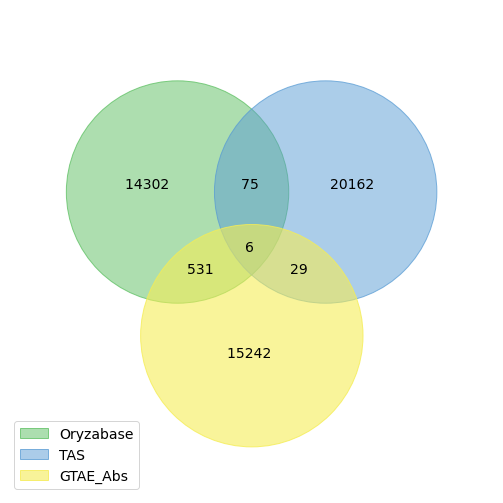

In [100]:
# RAP Venn
labels = venn.get_labels([Oryzabase_rap_to_set, TAS_rap_to_set,
                         GTAE_RAP_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn3(labels, names=['Oryzabase', 'TAS', 'GTAE_Abs'])
fig.show()

d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


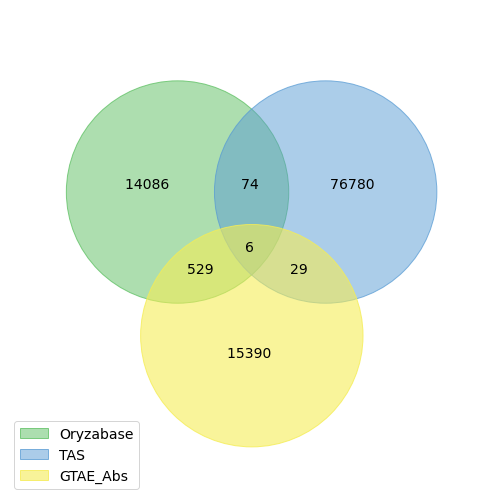

In [101]:
# MSU 3Venn
labels = venn.get_labels([Oryzabase_msu_to_set, TAS_msu_to_set,
                         GTAE_MSU_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn3(labels, names=['Oryzabase', 'TAS', 'GTAE_Abs'])
fig.show()

d:\pto_env_test\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


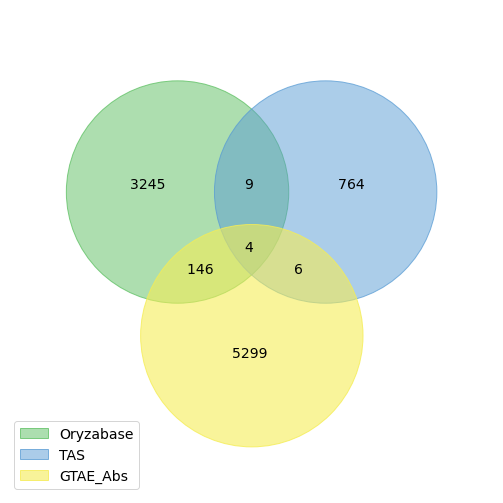

In [102]:
# Gramene Venn
# MSU Venn
# RAP Venn
labels = venn.get_labels([Oryzabase_gramene_to_set, TAS_gramene_to_set,
                         GTAE_Gramene_to_TO_abs_set],
                         fill=['number'])
fig, ax = venn.venn3(labels, names=['Oryzabase', 'TAS', 'GTAE_Abs'])
fig.show()